> # Бајесова анализа на финансиски податоци од берзата на САД
> #### Јован Крајевски (199015)
> ##### февруари, 2021
---

# Референци и забелешки за нив

## Трудови

- [Toth, D., & Jones, B. (2019). Against the Norm: Modeling Daily Stock Returns with the Laplace Distribution. arXiv preprint arXiv:1906.10325.](https://arxiv.org/ftp/arxiv/papers/1906/1906.10325.pdf)

Трудот посочува дека дистрибуцијата на дневните прирасти е Лапласова (што припаѓа на фамилијата општи нормални дистрибуции). Општите нормални дистрибуции затоа подобро го моделираат дневниот прираст. Овој труд не е многу цитиран.

- [Officer, R. R. (1972). The distribution of stock returns. Journal of the american statistical association, 67(340), 807-812.](https://www.tandfonline.com/doi/abs/10.1080/01621459.1972.10481297)

Немам целосен пристап до овој труд, но апстрактот посочува дека може да биде од интерес да се разгледа kurtosis на дневните прирасти. Тешки опашки не водат да размислуваме дека дистрибуцијата е подалеку од нормалната (и општите нормални).

- [Krämer, W. (2019). Asymmetry in the distribution of daily stock returns. Empirical Economics, 1-11.](https://link.springer.com/article/10.1007/s00181-019-01791-5)

Слично на претхдниот труд, немам целосен пристап но вреди да се разгледа skew на дневните прирасти. Асиметрија не води да размислуваме дека дистрибуцијата е подалеку од нормалната (и општите нормални).

- [Peiro, A. (1994). The distribution of stock returns: international evidence. Applied financial economics, 4(6), 431-439.](https://www.tandfonline.com/doi/abs/10.1080/758518675)

Повторно немам целосен пристап до трудот, но во нивниот апстракт заклучуваат дека студентовата т дистрибуција добро ги моделира дневните прирасти. Од претходниот предмет забележав дека општите нормални дистрибуции малку подобро го моделираат дневниот прираст од студентовата т дистрибуција. Ќе ја разгледаме и оваа дистрибуција во проектов.

## Блогови

- [THE DISTRIBUTION OF DAILY STOCK MARKET RETURNS](https://businessforecastblog.com/the-distribution-of-daily-stock-market-returns/)

# Вовед

Целта на овој проект е да се искористи Бајесовата статистика за анализа на акциите на берзата на САД. Анализата ќе се направи на еден од најпознатите индекси на берзата на САД - S&P 500. Овој индекс содржи околу 500 акции од самата берза. 

Класичната фреквенционистичка анализа на овие податоци беше направена по предметите „Анализа на податоци со статистички пакети“ и „Подготовка и истражувачка анализа на податоци“ и истата може да се најде [тука](https://nbviewer.jupyter.org/gist/jovan-krajevski/5c8fc51562601d81db550a65daf7a051). Подоле следи воведниот дел од оваа анализа, која што ги дефинира случајните променливи што ќе ги користиме во анализата.

# Собирање на податоци од берзата на САД

## Како фунцкионираат берзите?

На берзата постојат два типа на ентитети: **продавачи** и **купувачи**.

Повеќе продавачи можат да се приклучат на берзата и да ги понудат своите акции. Понудата за продажба на акции се нарекува **продажна нарачка**. Истовремено, повеќе купувачи можат да се приклучат на берзата и да се понудат да купат акции. Понудата за купување на акции се нарекува **куповна нарачка**. Продажните и купувачките нарачки се градбените единици на берзата.

Постојат различни типови на продажни и куповни нарачки, но тука ќе ги разгледаме најчестите две. Пософистицираните типови на нарачки не се од посебен интерес за преоктов, бидејќи не е целта да се тестираат различни стратегии за учество на берзата. Напротив, ниту овие нарачки не се од посебен интерес за оваа анализа, но нивното објаснување е корисно за да се дефинираат одредени случајни променливи кои ќе ги користиме во натамошните испитувања.

### Лимитирачки нарачки

Основниот тип на нарачка, било да е продажна или куповна, е **лимитирачката** нарачка. Со овој тип на нарачка, ентитетот X вели: *јас сум подготвен да купам/продадам $v$ акции ако и само ако некој друг ентитет е подготвен да ми ги продаде/купи овие акции по цена $M$*. Да го означиме овој тип на нарачка со $L_{buy, v, M}$, ако е продажна, или $L_{sell, v, M}$ ако е куповна. 

Секогаш кога постои пар на нарачки $L_{buy, v_1, M_1}$ и $L_{sell, v_2, M_2}$ за кои важи $M_1 \geq M_2$, на берзата се случува трансакција. После трансакцијата, во која што настанува размена на $min(v_1, v_2)$ акции по цена $M_2$, продажната нарачка продолжува да нуди $v_1 - min(v_1, v_2)$ акции за продажба, а куповната продолжува да бара $v_2 - min(v_1, v_2)$ акции за купување. Јасно е дека едната од овие две нарачки ќе биде **целосно исполнета** и ќе престане да биде дел од берзата бидејќи барем еден од броевите $v_1 - min(v_1, v_2)$ и $v_2 - min(v_1, v_2)$ е $0$.

Важно е да се напомене дека претходниот параграф не нужно е точен во случајот $M_1 > M_2$, односно цената по која што ќе се изврши трансакцијата во овој случај не мора да е $M_2$. Но, можеме да претпоставиме дека така функционира берзата, без притоа оваа претпоставка да има какво било влијание на понатамошната анализа.

Од тука, трансакција помеѓу две лимитирачки нарачки можеме да дефинираме како функција на следниов начин: 

$$
transaction(L_{buy, v_1, M_1}, L_{sell, v_2, M_2}) = \begin{cases}
(L_{buy, v_1, M_1}, L_{sell, v_2, M_2}), &\mbox{ако } M_1 < M_2 \\
(L_{buy, v_1 - v_2, M_1}), &\mbox{ако } M_1 \geq M_2 \text{ и } v_1 > v_2 \\
(L_{sell, v_2 - v_1, M_2}), &\mbox{ако } M_1 \geq M_2 \text{ и } v_1 < v_2 \\
(), &\mbox{ако } M_1 \geq M_2 \text{ и } v_1 = v_2
\end{cases}
$$

На берзата, оваа функција се извршува константно, така што во секој момент од **множеството на лимитирачки нарачки** $limitOrders$ се избира парот $(L_{buy, v_1, M_1}, L_{sell, v_2, M_2})$ со најниска ненегативна вредност на разликата $M_2 - М_1$, двете нарачки се отстрануваат од множеството на лимитирачки нарачки и во него се додаваат лимитирачките нарачки од торката резултат на $transaction(L_{buy, v_1, M_1}, L_{sell, v_2, M_2})$.

Кога веќе нема да може да се избере пар за кој трансакцијата ќе резултира во торка со помалку од 2 елементи, берзата **мирува**. Во овој момент на мирување, доколку во множеството на лимитирачки нарачки има останато и продажни и куповни лимитирачки нарачки, тогаш $ask = \inf{\{M_i | L_{sell, v_i, M_i} \in limitOrders \}}$, $bid = \sup{\{M_i | L_{buy, v_i, M_i} \in limitOrders \}}$ и важи $ask > bid$. Тоа значи дека ако ги претставиме преостанатите лимитирачки нарачки на една бројна права што ја претставува цената, сите куповни нарачки ќе се најдат лево од $bid$, а сите продажни нарачки ќе се најдат десно од $ask$. 

### Пазарни нарачки

**Пазарните нарачки** немаат прецизирана цена. Со нив, ентитетот Х вели: *јас сум подготвен да купам/продадам $v$ акции по најниската/највисоката можна цена*. Впрочем, ако ентитетот X купува акции, тој ќе ги купи акциите по цена $ask$, а ако продава, тој ќе ги продаде акциите по цена $bid$. Ваквите нарачки ќе ги бележиме со $M_{buy, v}$, ако се куповни, и $M_{sell, v}$.

Важно е да се напомене дека пазарната нарачка не секогаш може да се комплетира со една лимитирачка нарачка. Често пати, пазарната нарачка не може да се комплетира ниту со лимитирачки нарачки кои имаат иста цена. Во ваков случај, куповната пазарна нарачка нема да биде комплетирана по просечна цена $ask$, туку по просечна цена повисока од $ask$. Аналогно на тоа, и продажната пазарна нарачка нема да биде комплетирана по просечна цена $bid$, туку по просечна цена пониска од $bid$. Оваа појава е целосно опфатена во дефинирањето на трансакциите кои следат подоле.

Трансакција помеѓу пазарна продажна и лимитирачка куповна нарачка се дефинира на следниов начин:

$$
transaction(L_{buy, v_1, M_1}, М_{sell, v_2}) = \begin{cases}
(L_{buy, v_1 - v_2, M_1}), &\mbox{ако } v_1 > v_2 \\
(М_{sell, v_2 - v_1}), &\mbox{ако } v_1 < v_2 \\
(), &\mbox{ако } v_1 = v_2
\end{cases}
$$

Трансакција помеѓу пазарна куповна и лимитирачка продажна нарачка се дефинира на следниов начин:

$$
transaction(L_{sell, v_1, M_1}, М_{buy, v_2}) = \begin{cases}
(L_{sell, v_1 - v_2, M_1}), &\mbox{ако } v_1 > v_2 \\
(М_{buy, v_2 - v_1}), &\mbox{ако } v_1 < v_2 \\
(), &\mbox{ако } v_1 = v_2
\end{cases}
$$

## OHLCV кантички

Историските податоци на берзата традиционално се претставуваат со OHLCV кантички дефинирани на одреден временски интервал $[openTime, openTime + t]$, каде $t > 0$. $t$ најчесто претставува 1 минута, 5 минути, 15 минути, 1 ден, 1 месец. $openTime + t$ уште се нарекува $closeTime$, па интервалот можеме да го запишеме како $[openTime, closeTime]$.

Во секој ваков временски интервал се случуваат низа на трансакции. Да дефинираме случјна променливи $P_i$ - цената по која што се извршила $i$-тата трансакција во интервалот $[openTime, closeTime]$ и $V_i$ - бројот на акции кои се купиле/продале во $i$-тата трансакција во интервалот $[openTime, closeTime]$. Тогаш, за погоре дефинираните трансакции кои резултираат со **помалку од две нарачки** (бидејќи, настрана дефинициите во проектов, само тие трансакции навистина се трансакции), имаме:

|$i$-та трансакција|$P_i$|$V_i$|
|---|---|---|
|$$transaction(L_{buy, v_1, M_1}, L_{sell, v_2, M_2})$$|$$M_2$$|$$min\{v_1, v_2\}$$|
|$$transaction(L_{buy, v_1, M_1}, М_{sell, v_2})$$|$$M_1$$|$$min\{v_1, v_2\}$$|
|$$transaction(L_{sell, v_1, M_1}, М_{buy, v_2})$$|$$M_1$$|$$min\{v_1, v_2\}$$|

OHLCV кантичката за интервалот $[openTime, closeTime + t]$ се состои од 5 статистики врз случајните променливите $P_i$ и $V_i$. Имено, OHLCV е кратенка од Open, High, Low, Close, Volume, па како што и името наговестува, OHLCV кантичката е торка од 5 статистики: цената по која била извршена првата трансакција (Open), цената по која била извршена трансакцијата со највисока цена (High), цената по која била извршена трансакцијата со најниска цена (Low), цената по која била извшрена последната трансакција (Close) и вкупниот број на акции кои биле купени/продадени во овој интервал (Volume). Математички изразено,

$$
open(\{P_1, ..., P_N\}) = P_1 \\
high(\{P_1, ..., P_N\}) = max\{P_1, ..., P_{N}\} \\
low(\{P_1, ..., P_N\}) = min\{P_1, ..., P_{N}\} \\
close(\{P_1, ..., P_N\}) = P_N \\
volume(\{V_1, ..., V_N\}) = \sum_{i=1}^{N} V_i \\
\overrightarrow{OHLCV_{[openTime, closeTime]}} = (open(\{P_1, ..., P_N\}), high(\{P_1, ..., P_N\}), low(\{P_1, ..., P_N\}), close(\{P_1, ..., P_N\}), volume(\{V_1, ..., V_N\}))
$$

## Индекси

При анализа на берзата, често е од интерес да се дадат одговори на прашања кои ја засегаат целокупната берза, или некој дел од берзата, а не една поединечна акција. Пример, за да дадеме одговор на прашањата „дали цените на берзата опаѓаат?“ или „дали има економска криза на берзата?“, мораме да погледнеме повеќе акции истовремено.

Погоре ја дефиниравме случајната променлива $P_i$ - цената по која се извршила i-тата транскација на берзата. Но, погоре зборевме само за трансакции за една акција. Да дефинираме нова случајна променлива, $P_{i, j}$ - цената по која се извршила i-тата транскација за ј-тата акција на берзата. Сега можеме да дефинираме посебни типови на статистики - индекс статистики. 

Индекс статистиките во суштина се тежински (пондерирани? - weighted) аритметички средини на статистиките дефинирани во делот за OHLCV кантичките. Најчесто, во еден индекс, на акциите им се препишуваат тежини $\alpha_j, 1 \le j \le M, M$ - број на акции. Овие тежини можат да бидат базирани на market cap-от на акцијата (број на акции во оптек * цена на една акција), на волуменот, на типот на акција (пример, некои индекси ставаат тежини 0 на сите акции кои не се од одреден тип на индустрија, за да можат да ја доловат состојбата со конкретната индустрија од интерес) итн. Анализата на начинот на кој што се одредуваат тежините во индексот не припаѓа на опсегот на оваа проектна задача.

Откако се одредени тежините $\alpha_j$, можеме да ги дефинираме следниве индекс статистики:

$$
indexOpen(\{P_{1, 1}, ..., P_{1, M}, ..., P_{N, 1}, ..., P_{N, M}\}) = \sum_{j=1}^{M}\alpha_{j}P_{1,j} \\
indexHigh(\{P_{1, 1}, ..., P_{1, M}, ..., P_{N, 1}, ..., P_{N, M}\}) = max\{\sum_{j=1}^{M}\alpha_{j}P_{1,j}, ..., \sum_{j=1}^{M}\alpha_{j}P_{N,j}\} \\
indexLow(\{P_{1, 1}, ..., P_{1, M}, ..., P_{N, 1}, ..., P_{N, M}\}) = min\{\sum_{j=1}^{M}\alpha_{j}P_{1,j}, ..., \sum_{j=1}^{M}\alpha_{j}P_{N,j}\} \\
indexClose(\{P_{1, 1}, ..., P_{1, M}, ..., P_{N, 1}, ..., P_{N, M}\}) = \sum_{j=1}^{M}\alpha_{j}P_{N,j} \\
volume(\{V_{1, 1}, ..., V_{1, M}, ..., V_{N, 1}, ..., V_{N, M}\}) = \sum_{i=1}^{N}\sum_{j=1}^{M}\alpha_{j}V_{i,j} \\
\overrightarrow{indexOHLCV_{[openTime, closeTime]}} = \\
(indexOpen(\{P_{1, 1}, ..., P_{1, M}, ..., P_{N, 1}, ..., P_{N, M}\}), \\
indexHigh(\{P_{1, 1}, ..., P_{1, M}, ..., P_{N, 1}, ..., P_{N, M}\}), \\
indexLow(\{P_{1, 1}, ..., P_{1, M}, ..., P_{N, 1}, ..., P_{N, M}\}), \\
indexClose(\{P_{1, 1}, ..., P_{1, M}, ..., P_{N, 1}, ..., P_{N, M}\}), \\
indexVolume(\{V_{1, 1}, ..., V_{1, M}, ..., V_{N, 1}, ..., V_{N, M}\}))
$$


## Опис на библиотеката `yfinance`

Податоците од берзата на САД ќе бидат собрани користејќи го Yahoo finance и библиотеката `yfinance`. `yfinance` е библиотека што овозможува лесно да се превземат историските податоци достапни на Yahoo finance, но, како и секоја библиотека во светот на финансиите, доаѓа со свои ограничувања.

Имено, за временски интервали помали од 24 часа (т.н. intraday податоци) не можеме да ги земеме сите достапни OHLCV кантички, туку само оние во претходните 60 дена. Колку што повеќе се намалува временскиот интервал, толку помалку достапни стануваат самите OHLCV кантички. За постари intraday податоци, најчесто е потребно да се плати.

За оваа анализа ќе ги користиме дневните податоци.

## Симнување на податоците

Пред да започнеме со симнување на податоците, ќе дефинираме листа на индекси кои ќе ги анализираме. Податоците ќе ги симнеме со `yfinance` само доколку претходно не биле сочувани. Притоа, истите ќе ги сочуваме. Ако биле симнати, ќе ги прочитаме. Ако сакаме да ги презапишеме податоците во секој случај, можеме да поставиме `OVERWRITE_ANYWAY` да биде `True`.

Податоците ги сочуваваме во `pickle` формат, што е стандарден формат за чување на Python објекти на диск. Симнувањето, сочувувањето и читањето на податоците не одзема повеќе од 1 секунда.

In [1]:
import yfinance
import time
import pandas as pd
from pathlib import Path

indexes = ["^GSPC"]

OVERWRITE_ANYWAY = False

DATA_LOCATION = Path(".") / "bayes_data"
DAILY_LOCATION = DATA_LOCATION / "daily"
INTRADAY_LOCATION = DATA_LOCATION / "intraday"

DAILY_LOCATION.mkdir(exist_ok=True, parents=True)
INTRADAY_LOCATION.mkdir(exist_ok=True, parents=True)

start_time = time.time()

if OVERWRITE_ANYWAY or not (DAILY_LOCATION / "indexes.pkl").is_file():
    daily_smp = yfinance.download(" ".join(indexes),
                                           period="max",
                                           interval="1d")
    daily_smp.to_pickle(DAILY_LOCATION / "indexes.pkl")

daily_smp = pd.read_pickle(DAILY_LOCATION / "indexes.pkl")

end_time = time.time()
print(f"{end_time - start_time:.2f}s")

0.00s


Ако ги погледнеме колоните во податоците кои што сме ги симнале, ќе забележиме дека торката од статистики OHLCV е присутна, но постои и уште една статистика: Adj Close. Оваа статистика е функција од статистиката Close која во предвид зема и уште неколку фактори (поделби на дивиденди и сл.). Во овој проект, оваа статистика нема да биде земена предвид и ќе биде избришана.

In [2]:
daily_smp.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [3]:
daily_smp = daily_smp.drop("Adj Close", axis=1)
daily_smp

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2021-01-15,3788.729980,3788.729980,3749.620117,3768.250000,5353060000
2021-01-19,3781.879883,3804.530029,3780.370117,3798.909912,4982940000
2021-01-20,3816.219971,3859.750000,3816.219971,3851.850098,4551790000


Вака изгледа Close низ историјата.

<IPython.core.display.Javascript object>


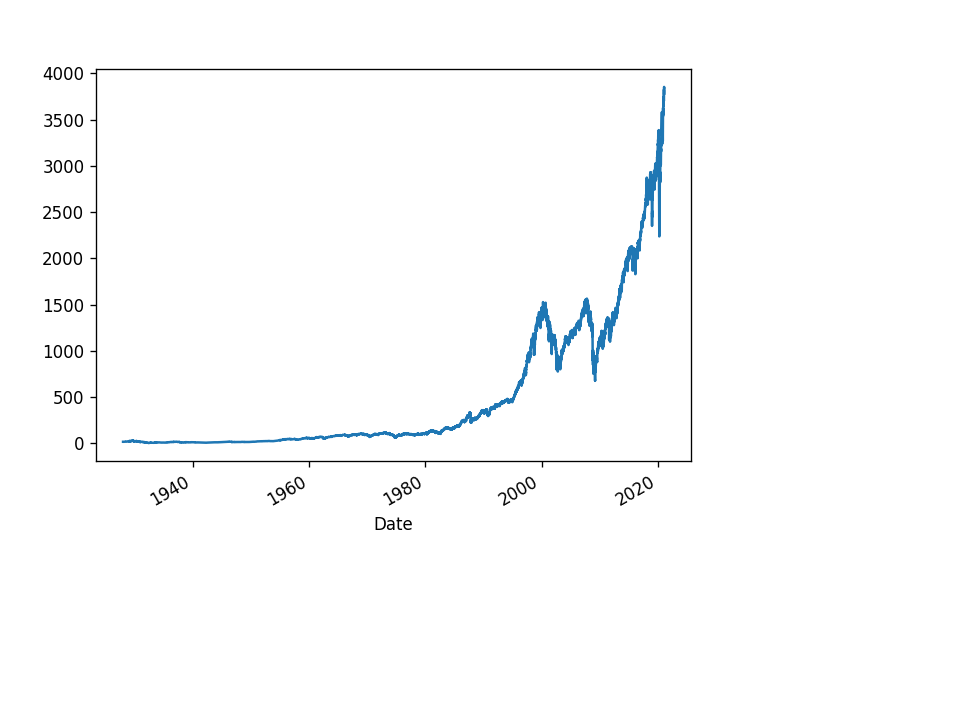

<AxesSubplot:xlabel='Date'>

In [4]:
%matplotlib notebook
daily_smp["Close"].plot()

# Поделба на податоците на тренирачко и тестирачко множество

Сите податоци од овој милениум ќе ги земеме како тестирачко множество (околу 23% од податоците). Бидејќи ќе работиме со прозорци и со различни приор статистики, важно е оваа поделба да ја направиме сега, за да се осигураме дека нема да имаме никакво претекување (leak) на тренирачките податоци во тестирачките.

In [5]:
train_smp = daily_smp[daily_smp.index < "01-01-2000"].copy()
test_smp = daily_smp[daily_smp.index >= "01-01-2000"].copy()
len(train_smp), len(test_smp)

(18078, 5298)

# Генерирање нови променливи - features

Овие променливи ќе ни помогнат во понатамошната анализа на податоците (кога ќе тренираме модели кои ќе послужат за да се утврди кои дистрибуции подобро го моделираат податочното множество). Бидејќи воглавно ќе разгледуваме линеарни модели, тие не можат да направат нелинеарни заклучоци од самите податоци, па затоа овие features ќе ги подобрат овие модели.

## Променливи креирани од датумот

Неколку значајни променливи кои можат да се креираат од самиот датум се:
- ден од неделата: (понеделник, вторник, среда, ..., недела) => (0, 1, ..., 6)
- ден од месецот: (1, 2, ..., 31)
- ден од годината: (1, 2, ..., 366)
- недела од годината: (1, 2, ..., 53)
- месец од годината: (1, 2, ..., 12)
- месец од кварталот: (1, 2, ..., 3)
- квартал од годината: (1, 2, ..., 4)
- година: (1920, 1921, ..., 2021)
- деценија од векот: (1920-1929, 1930-1939, ..., 2020-2029) => (192, 193, ..., 202)

Подоле можеме да видиме како ова изгледа.

In [6]:
def date_features(df):
    df["Day Of Week"] = df.index.dayofweek
    df["Day Of Month"] = df.index.day
    df["Day Of Year"] = df.index.dayofyear
    df["Week Of Year"] = df.index.isocalendar().week
    df["Month Of Year"] = df.index.month
    df["Month Of Quarter"] = (df.index.month - 1) % 3 + 1
    df["Quarter Of Year"] = df.index.quarter
    df["Year"] = df.index.year
    df["Decade Of Century"] = df.index.year // 10
    
date_features(train_smp)
date_features(test_smp)

train_smp

,Open,High,Low,Close,Volume,Day Of Week,Day Of Month,Day Of Year,Week Of Year,Month Of Year,Month Of Quarter,Quarter Of Year,Year,Decade Of Century
Date,,,,,,,,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,4,30,364,52,12,3,4,1927,192
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,1,3,3,1,1,1,1,1928,192
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,2,4,4,1,1,1,1,1928,192
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,3,5,5,1,1,1,1,1928,192
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,4,6,6,1,1,1,1,1928,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-12-27,1458.339966,1463.189941,1450.829956,1457.099976,722600000,0,27,361,52,12,3,4,1999,199
1999-12-28,1457.089966,1462.680054,1452.780029,1457.660034,655400000,1,28,362,52,12,3,4,1999,199
1999-12-29,1457.660034,1467.469971,1457.660034,1463.459961,567860000,2,29,363,52,12,3,4,1999,199


## Прираст (профит)

Прирастот (профитот) е статистиката која што ќе ни биде од главен интерес низ овој проект. Прирастот за даден временски интервал $t$ се дефинира како процентуалната промена во цените на две трансакции - $P_i$ и $P_j$, такви што $P_i$ е цена на трансакција што се случила во некој момент $a$, а $P_j$ е цена на трансакција што се случила во момент $a+t$. Во едно вакво сценарио, можеме да дефинираме прираст $return$ во моментот $a+t$ за временски интервал $t$ како $return(a+t, t)=\frac{P_j - P_i}{P_i}$.

За нашите податоци, прирастот што ќе го разгледуваме е за временски интервал $t$ од 1 ден. За да го направиме тоа, како цени на транскации во моменти на растојание $t$ можеме да ги земеме последователните $close$ статистики од $OHLCV$ торките. Овие пресметки лесно можат да се направат со помош на функцијата `.pct_change` во `pandas`. 

Секако, пазарот не е отворен секој ден од годината, па помеѓу некои од OHLCV торките ќе има повисок интервал од 1 ден. Ова е нешто што лесно можеме да го занемариме во нашата анализа, бидејќи не ги менува драстично заклучоците до кои се обидуваме да пристигнеме.

Дополнително, освен овој последователен прираст кој соодветствува на интервал 1 ден, можеме да разгледуваме и прирасти во поголеми интервали, кои се цел број на пати поголеми од интервалот $t$. Ова е едноставно да се постигне во `pandas`, со подавање на параметар `periods` на `pct_change`. За секој `periods` поголем од 0, првите `periods` записи ќе бидат `NaN`-ови.

Бидејќи ќе работиме со $close$ статистики, $open$, $high$ и $low$ можеме да ги отстраниме.

In [7]:
def return_features(df):
    for periods in [1, 5, 10, 15, 20, 30]:
        df[f"Return {periods}"] = df["Close"].pct_change(periods=periods)


def remove_features(col, df):
    df.drop(col, axis=1, inplace=True)


start_time = time.time()

for feature in ["High", "Low", "Open"]:
    remove_features(feature, daily_smp)

return_features(train_smp)
return_features(test_smp)

end_time = time.time()
print(f"{end_time - start_time:.2f}s")

train_smp

0.01s


,Open,High,Low,Close,Volume,Day Of Week,Day Of Month,Day Of Year,Week Of Year,Month Of Year,Month Of Quarter,Quarter Of Year,Year,Decade Of Century,Return 1,Return 5,Return 10,Return 15,Return 20,Return 30
Date,,,,,,,,,,,,,,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,4,30,364,52,12,3,4,1927,192,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,1,3,3,1,1,1,1,1928,192,0.005663,NaN,NaN,NaN,NaN,NaN
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,2,4,4,1,1,1,1,1928,192,-0.002252,NaN,NaN,NaN,NaN,NaN
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,3,5,5,1,1,1,1,1928,192,-0.009594,NaN,NaN,NaN,NaN,NaN
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,4,6,6,1,1,1,1,1928,192,0.006268,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-12-27,1458.339966,1463.189941,1450.829956,1457.099976,722600000,0,27,361,52,12,3,4,1999,199,-0.000850,0.025383,0.028270,0.016605,0.028575,0.054754
1999-12-28,1457.089966,1462.680054,1452.780029,1457.660034,655400000,1,28,362,52,12,3,4,1999,199,0.000384,0.027904,0.029988,0.024120,0.035395,0.044124
1999-12-29,1457.660034,1467.469971,1457.660034,1463.459961,567860000,2,29,363,52,12,3,4,1999,199,0.003979,0.020950,0.042967,0.038526,0.053675,0.049534


## Ризик (стандардна девијација на прираст)

Една важна статистика во финансиските податоци е ризикот да се инвестира во одредена акција. Ризикот најчесто се дефинира како стандардна девијација на прирастот во одреден временски интервал. Во нашиот случај, тој временски интервал ќе го дефинираме како број на последователни OHLCV кантички и ќе разгледуваме дисперзија на прирастот во последните 250 кантички (отрпилика 1 година). Поризичните акции ќе имаат повисок ризик и обратно.

In [8]:
def risk_features(df):
    cols = df.columns
    for col in df.columns:
        if not col.startswith("Return"):
            continue

        df[f"Risk {col.split()[1]}"] = df[col].rolling(250).std()


start_time = time.time()

risk_features(train_smp)
risk_features(test_smp)

end_time = time.time()
print(f"{end_time - start_time:.2f}s")

train_smp

0.01s


,Open,High,Low,Close,Volume,Day Of Week,Day Of Month,Day Of Year,Week Of Year,Month Of Year,...,Return 10,Return 15,Return 20,Return 30,Risk 1,Risk 5,Risk 10,Risk 15,Risk 20,Risk 30
Date,,,,,,,,,,,,,,,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,4,30,364,52,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,1,3,3,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,2,4,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,3,5,5,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,4,6,6,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-12-27,1458.339966,1463.189941,1450.829956,1457.099976,722600000,0,27,361,52,12,...,0.028270,0.016605,0.028575,0.054754,0.011441,0.024703,0.030997,0.036051,0.041039,0.044976
1999-12-28,1457.089966,1462.680054,1452.780029,1457.660034,655400000,1,28,362,52,12,...,0.029988,0.024120,0.035395,0.044124,0.011428,0.024718,0.030854,0.036005,0.041006,0.044827
1999-12-29,1457.660034,1467.469971,1457.660034,1463.459961,567860000,2,29,363,52,12,...,0.042967,0.038526,0.053675,0.049534,0.011428,0.024742,0.030770,0.036005,0.041020,0.044719


## Sharpe сооднос

Sharpe соодносот е статистика чија цел е да го измери прирастот за единица ризик на една акција. Традиционално, Sharpe соодносот се дефинира како: $sharpe=\frac{return - riskFreeReturn}{risk}$. За нашите цели, можеме да претпоставиме дека $riskFreeReturn$ е 0 (оваа претпоставка често ја прават и економистите). Најчесто, оние акции кои имаат повисок Sharpe сооднос се попривлечни за инвеститорите.

Како изгледа Sharpe соодносот можеме да погледнеме подоле.

In [9]:
def sharpe_features(df):
    cols = df.columns
    for col in df.columns:
        if not col.startswith("Return"):
            continue

        df[f"Sharpe {col.split()[1]}"] = df[col] / df[f"Risk {col.split()[1]}"]


start_time = time.time()

sharpe_features(train_smp)
sharpe_features(test_smp)

end_time = time.time()
print(f"{end_time - start_time:.2f}s")

train_smp

0.01s


,Open,High,Low,Close,Volume,Day Of Week,Day Of Month,Day Of Year,Week Of Year,Month Of Year,...,Risk 10,Risk 15,Risk 20,Risk 30,Sharpe 1,Sharpe 5,Sharpe 10,Sharpe 15,Sharpe 20,Sharpe 30
Date,,,,,,,,,,,,,,,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,0,4,30,364,52,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-03,17.760000,17.760000,17.760000,17.760000,0,1,3,3,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-04,17.719999,17.719999,17.719999,17.719999,0,2,4,4,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-05,17.549999,17.549999,17.549999,17.549999,0,3,5,5,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1928-01-06,17.660000,17.660000,17.660000,17.660000,0,4,6,6,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-12-27,1458.339966,1463.189941,1450.829956,1457.099976,722600000,0,27,361,52,12,...,0.030997,0.036051,0.041039,0.044976,-0.074317,1.027543,0.912029,0.460597,0.696292,1.217400
1999-12-28,1457.089966,1462.680054,1452.780029,1457.660034,655400000,1,28,362,52,12,...,0.030854,0.036005,0.041006,0.044827,0.033634,1.128875,0.971940,0.669895,0.863174,0.984319
1999-12-29,1457.660034,1467.469971,1457.660034,1463.459961,567860000,2,29,363,52,12,...,0.030770,0.036005,0.041020,0.044719,0.348164,0.846729,1.396394,1.070034,1.308497,1.107685


# Вредности што недостасуваат

Ова податочно множество нема многу вредности кои недостасуваат, па истите можеме едноставно да ги игнорираме.

In [10]:
clean_train_smp = train_smp.dropna()
clean_train_smp

,Open,High,Low,Close,Volume,Day Of Week,Day Of Month,Day Of Year,Week Of Year,Month Of Year,...,Risk 10,Risk 15,Risk 20,Risk 30,Sharpe 1,Sharpe 5,Sharpe 10,Sharpe 15,Sharpe 20,Sharpe 30
Date,,,,,,,,,,,,,,,,,,,,,
1929-02-11,24.980000,24.980000,24.980000,24.980000,0,0,11,42,7,2,...,0.033680,0.039295,0.043095,0.052741,2.239426,-1.124671,-0.433358,0.122839,0.368025,0.790683
1929-02-13,24.950001,24.950001,24.950001,24.950001,0,2,13,44,7,2,...,0.033720,0.039275,0.043073,0.052632,-0.121830,-1.268861,-0.479454,-0.121874,0.689876,0.468170
1929-02-14,24.850000,24.850000,24.850000,24.850000,0,3,14,45,7,2,...,0.033773,0.039263,0.043061,0.052541,-0.406472,-1.087728,-0.698064,-0.373654,0.274211,0.030686
1929-02-15,24.350000,24.350000,24.350000,24.350000,0,4,15,46,7,2,...,0.034018,0.039343,0.043122,0.052540,-2.021981,-0.630581,-1.587420,-0.720125,-0.319341,-0.390465
1929-02-18,24.389999,24.389999,24.389999,24.389999,0,0,18,49,8,2,...,0.034178,0.039401,0.043104,0.052484,0.166339,-0.088965,-1.641823,-1.085724,-0.355913,-0.352699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999-12-27,1458.339966,1463.189941,1450.829956,1457.099976,722600000,0,27,361,52,12,...,0.030997,0.036051,0.041039,0.044976,-0.074317,1.027543,0.912029,0.460597,0.696292,1.217400
1999-12-28,1457.089966,1462.680054,1452.780029,1457.660034,655400000,1,28,362,52,12,...,0.030854,0.036005,0.041006,0.044827,0.033634,1.128875,0.971940,0.669895,0.863174,0.984319
1999-12-29,1457.660034,1467.469971,1457.660034,1463.459961,567860000,2,29,363,52,12,...,0.030770,0.036005,0.041020,0.044719,0.348164,0.846729,1.396394,1.070034,1.308497,1.107685


In [11]:
clean_test_smp = test_smp.dropna()
clean_test_smp

,Open,High,Low,Close,Volume,Day Of Week,Day Of Month,Day Of Year,Week Of Year,Month Of Year,...,Risk 10,Risk 15,Risk 20,Risk 30,Sharpe 1,Sharpe 5,Sharpe 10,Sharpe 15,Sharpe 20,Sharpe 30
Date,,,,,,,,,,,,,,,,,,,,,
2001-02-09,1332.530029,1332.530029,1309.979980,1314.760010,1075500000,4,9,40,6,2,...,0.035017,0.040732,0.044917,0.047601,-0.957501,-0.928213,-0.847072,-0.508007,-0.202361,-0.223846
2001-02-12,1314.760010,1330.959961,1313.640015,1330.310059,1039100000,0,12,43,7,2,...,0.035048,0.040734,0.044872,0.047562,0.848638,-0.640236,-0.708206,-0.230156,0.198764,-0.061614
2001-02-13,1330.310059,1336.619995,1317.510010,1318.800049,1075200000,1,13,44,7,2,...,0.035122,0.040771,0.044785,0.047563,-0.621005,-0.893216,-1.138482,-0.750031,-0.132124,-0.023568
2001-02-14,1318.800049,1320.729980,1304.719971,1315.920044,1150300000,2,14,45,7,2,...,0.035159,0.040825,0.044725,0.047604,-0.156736,-0.672329,-1.042931,-0.868614,-0.227880,0.534468
2001-02-15,1315.920044,1331.290039,1315.920044,1326.609985,1153700000,3,15,46,7,2,...,0.035056,0.040843,0.044550,0.047556,0.588259,-0.160748,-0.973229,-0.557307,-0.355687,-0.326911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-15,3788.729980,3788.729980,3749.620117,3768.250000,5353060000,4,15,15,2,1,...,0.058292,0.073976,0.084497,0.098442,-0.329050,-0.359312,0.055629,0.286624,0.214493,0.274762
2021-01-19,3781.879883,3804.530029,3780.370117,3798.909912,4982940000,1,19,19,3,1,...,0.058293,0.073971,0.084492,0.098423,0.372275,-0.004488,0.455495,0.349921,0.243006,0.366288
2021-01-20,3816.219971,3859.750000,3816.219971,3851.850098,4551790000,2,20,20,3,1,...,0.058309,0.073973,0.084498,0.098401,0.637155,0.324572,0.575173,0.421585,0.454444,0.419591


# Дефинирање на проблемот

## Прозорци (rolling windows)

Целта на овој проект е да се моделираат дневните прирасти на индексот S&P 500 во период од една година (или, отпилика, на 250 последователни OHLCV кантички + нови променливи). За полесно да се објасни како се дефинираат овие периоди на последователни OHLCV кантички + нови променливи, да го обележиме секој ред од овие податоци со $\overrightarrow{X_k} = (indexClose(\{P_{1, 1}, ..., P_{1, M}, ..., P_{N, 1}, ..., P_{N, M}\}), volume(\{V_{1, 1}, ..., V_{1, M}, ..., V_{N, 1}, ..., V_{N, M}\}), ...)$, каде што се земени предвид цените и волумените кои кореспондираат на датумот од $k$-тата редица од `clean_daily_smp`.

Еден период од последователни OHLCV кантички + нови променливи кои сме ги генерирале (*прозорец* во понатамошниот текст) можеме да го дефинираме со вектор $W_k = (\overrightarrow{X_k}, ..., \overrightarrow{X_{k+L-1}})$, каде што $L$ е бројот на последователни OHLCV кантички + нови променливи од интерес (во нашиот случај - 250). $W_k$ е матрица. Ваква матрица можеме да дефинираме за секое $k$ и можеме да забележиме дека последните $L-1$ полиња на $W_k$ се исти со првите $L-1$ полиња на $W_{k+1}$, дека дека последните $L-2$ полиња на $W_k$ се исти со првите $L-2$ полиња на $W_{k+2}$, дека последните $L-3$ полиња на $W_k$ се исти со првите $L-3$ полиња на $W_{k+3}$ итн.

Конечно, можеме да дефинираме вектор од овие прозорци - $data = (W_1, ..., W_N)$. $data$ има 3 димензии. $data_{i,k,j}$ ја претставува вредноста во $j$-тата колона на $i+k$-тата редица од `clean_daily_smp`. Секое $data_{i}$ преставува еден опит, секое $data_{i,k}$ претставува едно набљудување во $i$-от опит, секое $data_{i,k,ј}$ претставува една статистика од $k$-тото набљудување од $i$-от опит.

Ако $R$ е бројот на редици, a $C$ бројот на колони на `clean_daily_smp`, тогаш $1 \le i \le R - L + 1$, $1 \le k \le L$ и $1 \le j \le C$.

Подоле следи кодот кој што ги генерира овие прозорци. Тестирачкото множество сега содржи околу 21.4% од прозорците.

In [12]:
def get_rolling_windows(df, L=250):
    return [df.iloc[x:x + L] for x in range(len(df) - L + 1)]

start_time = time.time()

train_data = get_rolling_windows(clean_train_smp)
test_data = get_rolling_windows(clean_test_smp)

end_time = time.time()
print(f"{end_time - start_time:.2f}s")

len(train_data), len(test_data)

1.57s


(17550, 4770)

## Бајесова анализа за одредување на параметрите на дистрибуцијата на дневниот прираст

Ќе започнеме со одредена приор дистрибуција на дневните прирасти. Со секој нов опит ($data_i$), ќе ги искористиме $L$-те набљудувања ($\{data_{i,1}, ..., data_{i,L}\}$) и бајеосовото правило за да пресметаме постериор дистрибуција на дневните прирасти. Притоа, на одредени интервали, приорот ќе го ажурираме и ќе го заменуваме со последната пресметана постериор дистрибуција. 

Целта на ваквото ажурирање на приорот е интуитивно. Ние тука работиме со временска серија и јасно е дека нашите приор верувања треба да се менуваат со текот на времето. Контра-интуитивно е да користиме исти приор верувања во време на просперитет на пазарот и во време на криза. Едноставно, приорот од 2002 година најверојатно ќе биде бескорисен во 2008 година.

Да го обележиме приорот во $i$-от ден со $P(\theta|i)$, каде што $\theta$ ќе ни биде множеството на параметри од интерес. Овој приор ја моделира нашата доверба во параметрите на дистрибуцијата на дневниот прираст.

Подобноста на набљудувањата (likelihood) $data_i=\{data_{i,1}, ..., data_{i,L}\}$ тогаш ќе ни биде $P(data_i|\theta,i)$. Подобноста ја претставува веројатноста да се појават набљудувањата од опитот за дадени вредности на $\theta$. Секако, ние во случајов немаме една конкретна вредност на $\theta$, туку работиме со различни вредности за кои имаме различни верувања дека се точни. За секоја вредност на $\theta$, ние ја пресметуваме подобноста.

Постериорната веројатност се пресметува по бајесовото правило и изнесува $P(\theta|data_i,i)=\frac{P(\theta|i)P(data_i|\theta,i)}{\int P(data_i|\theta,i)P(\theta|i)}$. Оваа постериорна веројатност ќе ни послужи за понатамошна анализа на дневниот прираст. На секои $t$ дена, постериорната дистрибуција ќе ја искористиме како нова приор дистрибуција за наредните денови, т.е. ќе важи дека $P(\theta|i+ј)=P(\theta|data_i,i)$, каде што $i$ е денот на кој сме одлучиле постериорот да го корисиме како нов приор, а $1 \le j <t$.

Секако, тешко е точно да ја определиме формата на постериорната дистрибуција, па затоа ќе го искористиме методот Monte Carlo Markov Chain (MCMC) за да извлечеме примероци од постериор дистрибуцијата и да ја апроксимираме формата на постериорната дистрибуција. На MCMC ќе се навратиме подоцна, а прво ќе се задржиме на тоа како да ја интерполираме формата на дистрибуцијата доколку имаме примероци од неа.

За оваа цел ќе го искористиме методот на оценување на функцијата на распределба користејќи Гаусови јадра (кернели) од пакетот `SciPy`. Резултатите од овој метод можат да се искористат како влез на фукцијата `Interpolated` од пакетот `PyMC3` кој што ќе го кориситиме за да ја направиме бајесовата анализа. `Interpolated` прима низа на точки со густини на распределба во тие точки и конструира дистрибуција.

Добивањето на постериор дистрибуција користејќи Гаусови јадра (кернели) од извлечените (sampled) податоци од постериорната дистрибуција добиени со помош на методот Monte Carlo Markov Chain (MCMC) се постигнува со следниов код (превземан од [примерите](https://docs.pymc.io/notebooks/updating_priors.html) во документацијата на `PyMC3`). Истиот е изменет да прими и параметар `testval` кој што ќе го објасниме подоцна, заедно со MCMC.

In [13]:
import numpy as np
import pymc3 as pm
from scipy import stats as ss

def from_posterior(param, samples, testval, set_testval):
    smin, smax = np.min(samples), np.max(samples)
    width = smax - smin
    x = np.linspace(smin, smax, 100)
    y = ss.gaussian_kde(samples)(x)

    # what was never sampled should have a small probability but not 0,
    # so we'll extend the domain and use linear approximation of density on it
    x = np.concatenate([[x[0] - 3 * width], x, [x[-1] + 3 * width]])
    y = np.concatenate([[0], y, [0]])
    if set_testval:
        return pm.distributions.Interpolated(param, x, y, testval=testval)
    
    return pm.distributions.Interpolated(param, x, y)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Корисни статистики од постериор дистрибуција

За да провериме колку нашите постериор дистрибуции се блиски до вистинската дистрибуција, истите ќе ги искористиме за да го предвидиме дневниот прираст наредниот ден. Но, без разлика какви модели користиме, нема да е корсино да ги користиме сите примероци извлечени од постериор дистрибуцијата, поради тоа што димензионалноста на влезот ќе стане преголема. Затоа, потребно е да конструираме неколку статистики кои понатаму ќе ги користиме.

Во кодот што следи, ги генерираме статистиките:
- просечна вредност на примерок
- стандардна девијација на примерок
- процент на позитивни прирасти
- перцентили (0, 5, ..., 50 - медијана, ..., 95, 100)

In [14]:
def get_stats(sample):
    return [
        np.mean(sample),
        ss.tstd(sample),
        np.mean(sample > 0),
        ss.skew(sample),
        ss.kurtosis(sample),
    ] + [np.percentile(sample, p) for p in range(0, 101, 5)]

get_stats(np.random.randn(10000))

[-0.007889529012868855,
 0.9885773632774174,
 0.4977,
 -0.020209986917093276,
 0.02435597884532026,
 -3.6323355159528905,
 -1.649944423344592,
 -1.2747748829581724,
 -1.027192485983734,
 -0.836319900841982,
 -0.6713511532654766,
 -0.5195165864099477,
 -0.38534067738433697,
 -0.25783705202101626,
 -0.13053141272066227,
 -0.004222282229548589,
 0.1204144453409198,
 0.2538018640964643,
 0.3778865071197299,
 0.511608305417844,
 0.6536573805394479,
 0.8145378156704892,
 1.0147386473832838,
 1.2461236381872618,
 1.6151040411995619,
 3.9939911457321626]

## Различни пристапи на моделирање на дистрибуцијата на дневниот прираст

### Фиксен тип/фамилија на дистрибуција, променливи параметри

Ќе започнеме со тоа што ќе претпоставиме фиксен тип на дистрибуција на дневните прирасти (пример: нормална, коши, студентова т итн.) и само ќе ги анализираме параметрите на оваа дистрибуција.

За поедноставно да се објасни ова, да претпоставиме дека дневниот прираст има нормална дистрибуција. Оваа претпоставка често се прави за поедноставно да се опишат одредени статистички процедури, иако во нашиот случај е далеку од вистинита. Тогаш, можеме да започнеме со некои приор дистрибуции за параметрите на нормалната дистрибуција (средна вредност и стандардна девијација) и да го користиме горе опишаниот метод за да ги добиеме новите постериор дистрибуции за овие параметри за секој прозорец.

Кога ќе добиеме нови постериор дистрибуции за параметрите, можеме да влечеме примероци од нормалната дистрибуција чии параметри ќе ги следат овие дистрибуции. Тоа може да се постигне со функцијата `fast_sample_posterior_predictive` од `PyMC3`.

Ова значи дека постериор дистрибуцијата на дневниот прираст секогаш ќе биде нормална, а дистрибуцијата на параметрите на оваа дистрибуција ќе се менуваат.

Во овој проект ќе ги разгледаме следниве дистрибуции:
- нормална дистриција
- коши дистрибуција
- двојно-експоненцијална дистрибуција
- студентова т дистрибуција

#### Фиксен тип на дистрибуција: Нормална дистрибуција

Дека дневните прирасти имаат нормална дистрибуција е многу наивна претпоставка која емпириски е одамна отфрлена. Но, за да започнеме и детално да ја објасниме постапката, убаво е да се искористи токму оваа дистрибуција. За останатите дистрибуции ќе се користи истиов принцип, па нема да има потреба повторно да го објаснуваме.

Нормалната дидстрибуција е дефинирана од 2 парамтери: средна вредност - $\mu$ и стандардна девијација - $\sigma$. Тоа значи дека треба да дефинираме приори за овие два параметра.

Средната вредност можеме да ја опишеме со нормален приор. Ова е мотивирано од централната гранична теорема, која тврди дека просекот на голем број примероци има приближно нормална дистрибуција. 

Овој приор повторно има два параметри: средна вредност и стандардна девијација. Средната вредност на приорот на средната вредност на дневниот прираст може да биде просекот на просечните дневен прираст во сите прозорците, додека стандардната девијација на приорот на средната вредност на дневниот прираст може да биде стандардната девијација на просечните дневни прирасти во сите прозорци. Овие два параметри се нарекуваат хипер-параметри.

Од друга страна, стандардната девијација мора да биде позитивна, па затоа ќе ја искористиме полу-нормалната дистрибуција. Немаме некој посебна мотивација зад овој избор, освен тоа дека очекуваме стандардната девијација да нема тешка опашка кон бесконечност. 

Овој приор има еден параметар: стандардната девијација. Стандардната девијација на приорот на стандардната девијација на дневниот прираст може да биде стандардната девијација на ризиците. Овој параметар исто така се нарекува хипер-параметар.

Пред да започнеме со бајесовата анализа, ќе направиме неколку функции кои ќе ни го сочувуваат прогресот (бидејќи пресметките се спори). Ќе ги зачуваме статистиките за кои претходно говоревме, како и последниот модел.

In [15]:
import pickle

DATA_LOCATION = Path(".") / "bayes_models"
DATA_LOCATION.mkdir(exist_ok=True, parents=True)

def read_stats_and_model(model_name):
    if not (DATA_LOCATION / model_name).is_file():
        return [], None
    
    with open(DATA_LOCATION / model_name, "rb") as f:
        return pickle.load(f)
    
def write_stats_and_model(model_name, stats, model):
    with open(DATA_LOCATION / model_name, "wb") as f:
        pickle.dump((stats, model), f)

Наредно, ќе направиме две функции кои ќе го креираат моделот за нормалната дистрибуција. Едната функција ќе го креира инициајлниот модел, а втората ќе го креира моделот каде што постериорите ќе бидат искористени како нови приори за парамтерите.

Во функцијата за иницијалниот модел креираме две т.н. слободни случајни променливи. Тоа се променливи за кои немаме вредности. Од друга страна, креираме и една т.н. набљудувана случајна променлива на која и ги задаваме дневните прирасти. 

Во функцијата што го креира моделот каде што приорите на параметрите се поставуваат од претходни постериори се користи `from_posterior` што ја дефиниравме погоре.

Во двете функции поставуваме вредност и на параметарот `testval`. Оваа вредноста нема значење за самото дефинирање на моделот, туку е корисна за побрза конвергенција на MCMC моделот. Имено, се препорачува почетните вредности на параметрите да бидат блиску до највисоката густина на распределба на постериорот (MAP). За таа цел, корисно е пред да се започне влечењето на примероци, да се најде MAP, а MAP полесно се наоѓа ако започнеме со барање во околината на оние вредности кои ги оценуваат параметрите фреквенционистички. `testval` се тие вредности од кои започнуваме да го бараме MAP (или каде што започнуваме со MCMC ако го скокнеме чекорот на наоѓање MAP).

In [16]:
def get_initial_normal_model(data, prior_mu_mean, prior_mu_sigma,
                             prior_std_sigma):
    model = pm.Model()
    with model:
        mu = pm.Normal("mu",
                       mu=prior_mu_mean,
                       sigma=prior_mu_sigma,
                       testval=data.get_value().mean())
        std = pm.HalfNormal("std",
                            sigma=prior_std_sigma,
                            testval=data.get_value().std(ddof=1))
        obs = pm.Normal("obs", mu=mu, sigma=std, observed=data)

    return model


def get_next_normal_model(data, trace, set_testval):
    model = pm.Model()
    with model:
        mu = from_posterior("mu", trace["mu"],
                            data.get_value().mean(), set_testval)
        std = from_posterior("std", trace["std"],
                             data.get_value().std(ddof=1), set_testval)
        obs = pm.Normal("obs", mu=mu, sigma=std, observed=data)

    return model

Откако ни се дефинирани моделите, потребно е да го искористиме методот на MCMC за да извлечеме примероци од нив. За таа цел се користи функцијата `sample` од `PyMC3`. На оваа функција не мора да и се задаваат некои посебни парамтери, но ние сепак ќе го сториме тоа и ќе ги зададеме следниве параметри:

- chains: колку независни итерации на MCMC ќе бидат направени (=6)
- draw: колку примероци ќе бидат извлечени во секој chain (=1000)
- step: кој MCMC метод да се користи (=Metropolis)

Ќе се задриме накратко на MCMC методот што го бираме. Во предметот се обработија два MCMC методи: Metropolis и Gibs. Двата се достапни преку `PyMC3` и можат да се користат, но овде ќе го користиме стандарниот Metropolis пристап.

Претходно спомнавме дека е добро да најдеме почетна точка за MCMC методите која што е блиску до MAP. Тој MAP за Metropolis автоматски се наоѓа со помош на функцијата `advi` од `PyMC3`. 

Подоле следи код кој што инстанцира нов иницијален модел и семплира постериор дистрибуции користејќи го првиот прозорец. Пред да стигнеме до него, можеме да ги пресметаме вредностите на хиперпарамтерите.

In [17]:
start_time = time.time()

prior_mu_mean = np.array([window["Return 1"].mean()
                          for window in train_data]).mean()
prior_mu_sigma = np.array([window["Return 1"].mean()
                           for window in train_data]).std(ddof=1)
prior_std_sigma = np.array([window["Risk 1"].mean()
                            for window in train_data]).std(ddof=1)

end_time = time.time()
print(f"{end_time - start_time:.2f}s")

4.64s


Вака изгледа бајесовата анализа, која што трае неколку секунди:

In [19]:
import theano

data_sample = theano.shared(train_data[0]["Return 1"].to_numpy())

model = get_initial_normal_model(data_sample, prior_mu_mean, prior_mu_sigma,
                                 prior_std_sigma)

with model:
    trace = pm.sample(draws=2000, step=[pm.Metropolis()], chains=6, cores=6)
    posterior_obs = pm.fast_sample_posterior_predictive(trace)

/home/jovan/magisterski/exploratory/.venv/lib/python3.8/site-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Multiprocess sampling (6 chains in 6 jobs)
CompoundStep
>Metropolis: [std]
>Metropolis: [mu]


Sampling 6 chains for 1_000 tune and 2_000 draw iterations (6_000 + 12_000 draws total) took 2 seconds.
The number of effective samples is smaller than 10% for some parameters.


Подоле ја користиме библиотеката `arviz` за прикажеме некои графици од интерес.

Прво, графички ги прикажуваме влечењата со MCMC методот на двата параметри: средна вредност и стандардна девијација. 6-те chains се прикажани со различни типови на линии (некоја е полна, некоја е испрекината итн.), но она што може да се примети е дека овие chains не се разликуваат драстично еден од друг, иако очекувано постојат одредени разлики.

Потоа, ја претставуваме постериор дистрибуцијата на двата параметри, заедно со нивните 94 процентни HDI (интервали на висока густина на распределба).

Најдоле ги претставуваме и влечењата од нормалната дистрибуција, користејќи ги постериорите како дистрибуции на нејзините параметри. Графички се претставени и квартилите.

<IPython.core.display.Javascript object>


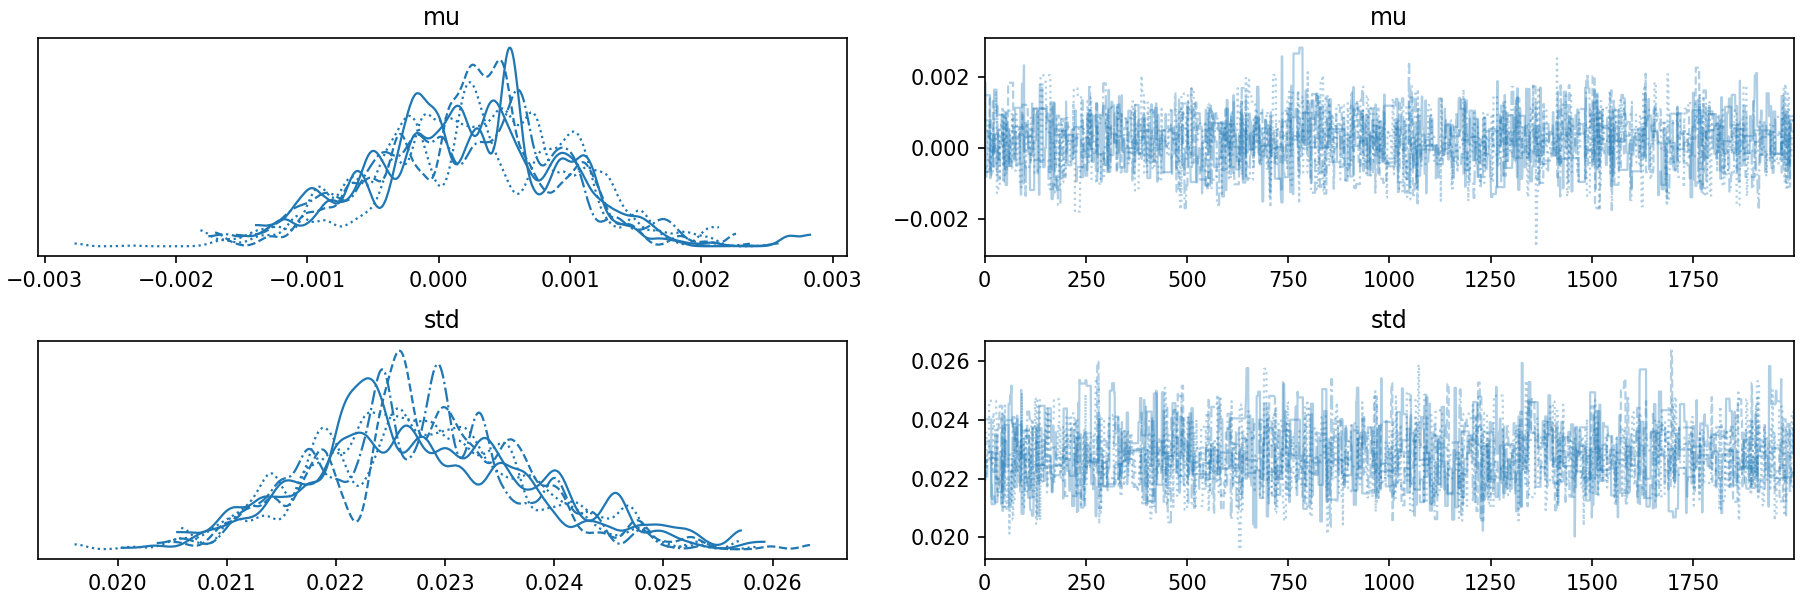

<IPython.core.display.Javascript object>


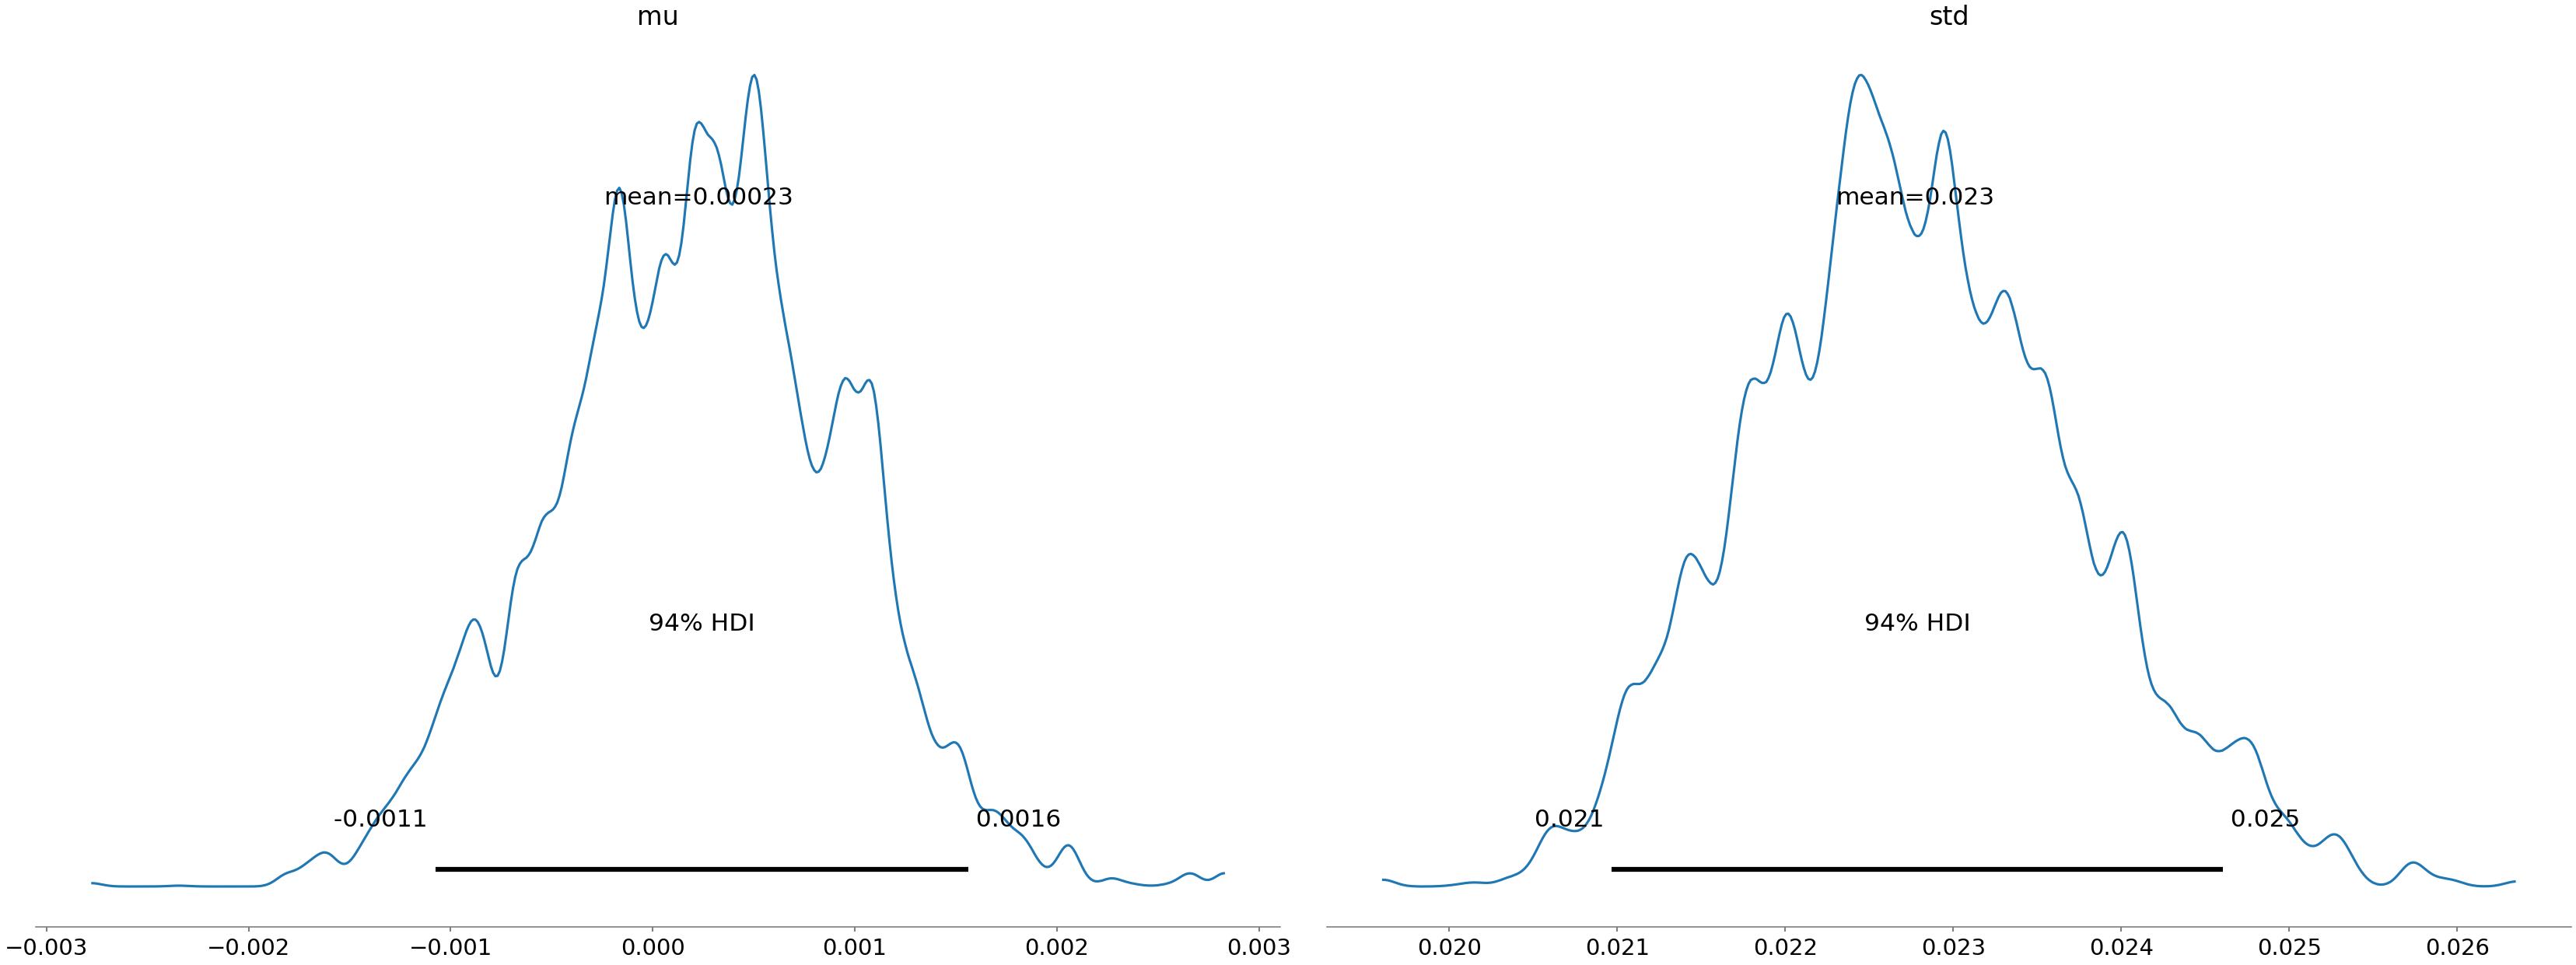

In [20]:
import arviz as az
with model:
    az.plot_trace(trace)
    az.plot_posterior(trace)

<IPython.core.display.Javascript object>


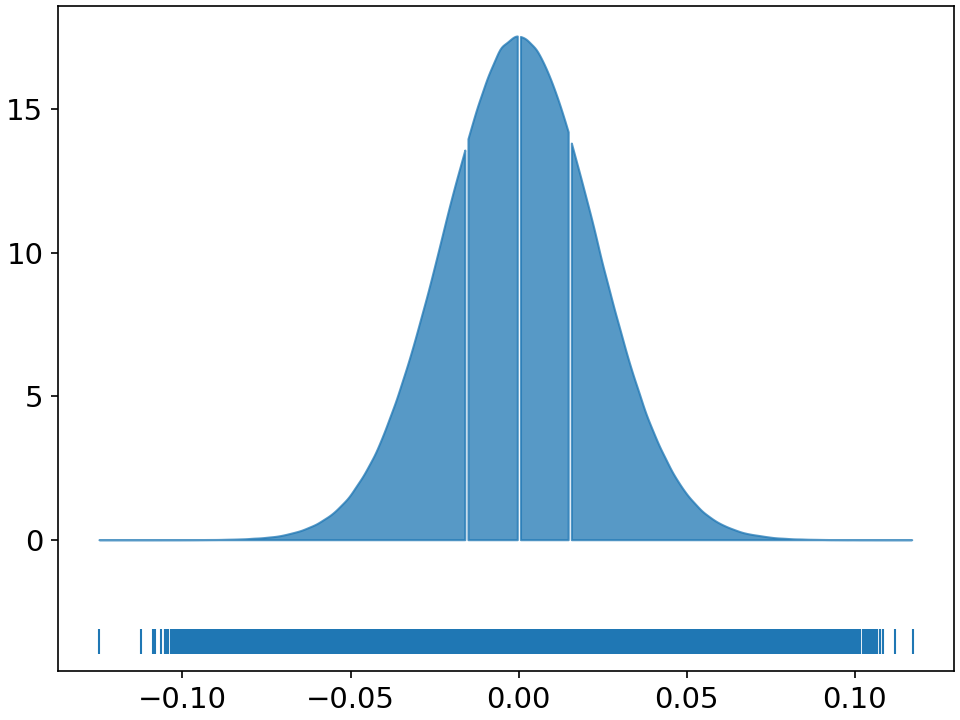

In [21]:
with model:
    az.plot_dist(posterior_obs["obs"].flatten(),
                 rug=True,
                 quantiles=[.25, .5, .75])

Сега можеме да ги искористиме горните функции за да креираме модел кој како приори за параметрите ќе ги користи постериорите кои горе ги прикажавме графички. Во код, тоа изгледа вака:

In [23]:
data_sample = theano.shared(train_data[1]["Return 1"].to_numpy())

model = get_next_normal_model(data_sample, trace, True)

with model:
    trace = pm.sample(draws=2000, step=[pm.Metropolis()], chains=6, cores=6)
    posterior_obs = pm.fast_sample_posterior_predictive(trace)

/home/jovan/magisterski/exploratory/.venv/lib/python3.8/site-packages/pymc3/sampling.py:465: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  warnings.warn(
Multiprocess sampling (6 chains in 6 jobs)
CompoundStep
>Metropolis: [std]
>Metropolis: [mu]


Sampling 6 chains for 1_000 tune and 2_000 draw iterations (6_000 + 12_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.


Исто како и претходно, можеме да исцртаме графици за постериорите:

<IPython.core.display.Javascript object>


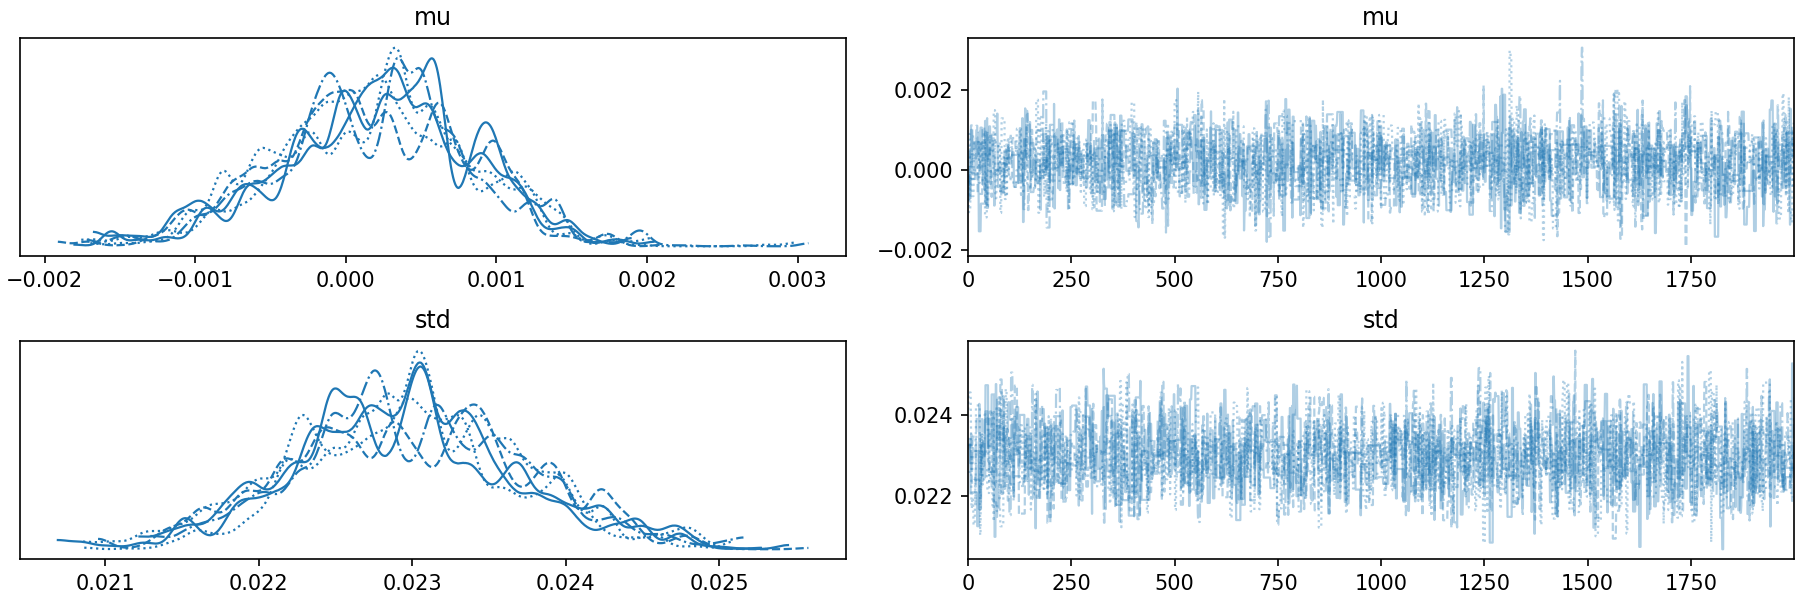

<IPython.core.display.Javascript object>


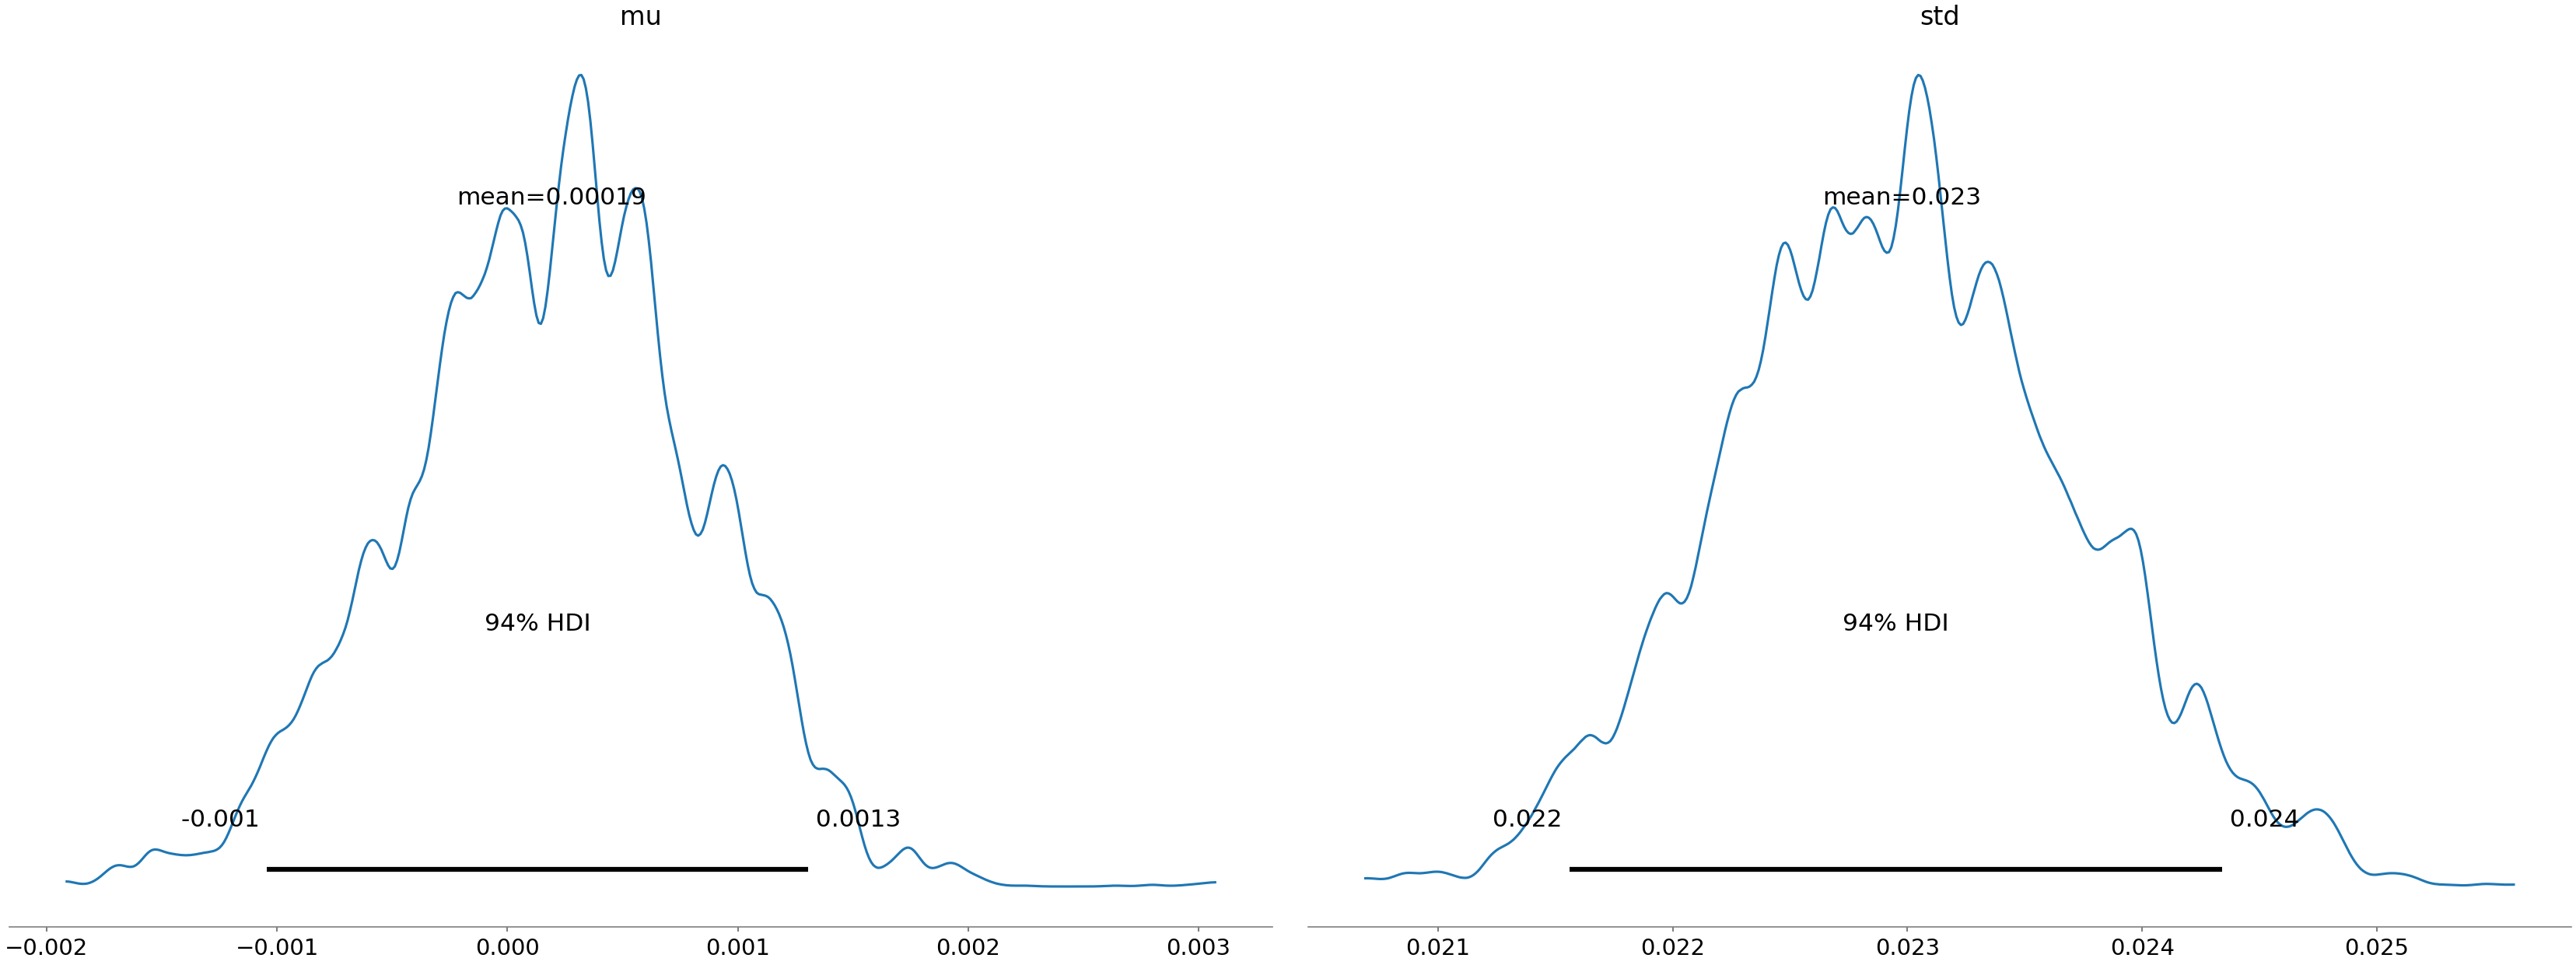

In [24]:
with model:
    az.plot_trace(trace)
    az.plot_posterior(trace)

<IPython.core.display.Javascript object>


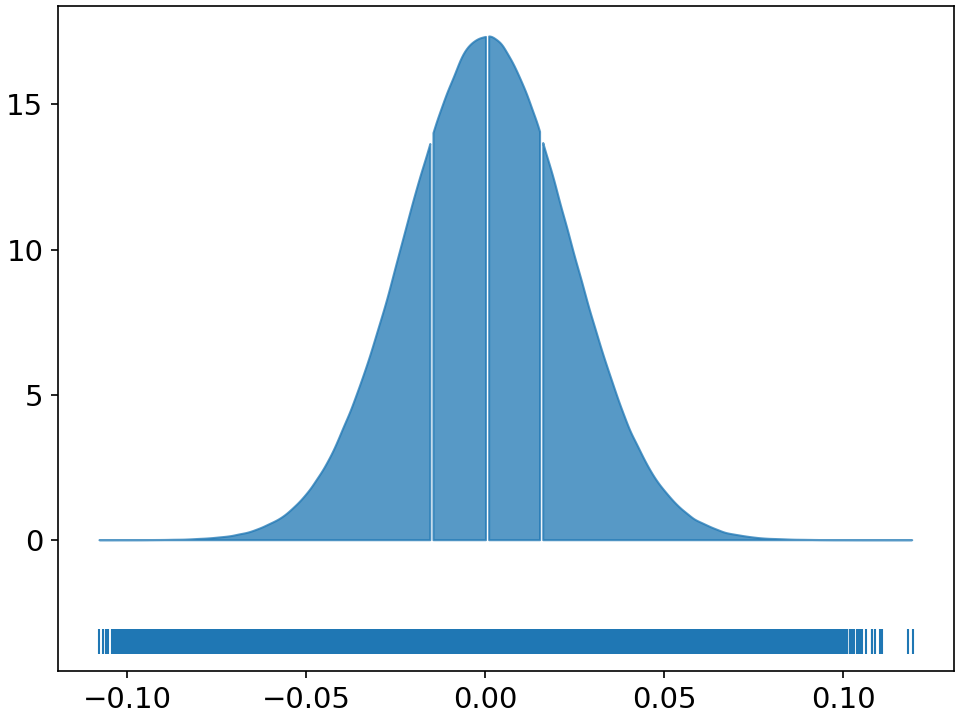

In [25]:
with model:
    az.plot_dist(posterior_obs["obs"].flatten(),
                 rug=True,
                 quantiles=[.25, .5, .75])

Со сето ова, комплетно е објаснет целиот механизам кој што ќе го искористиме за да ја апроксимираме дистрибуцијата на дневниот прираст. Приорите ќе ги ажурираме на секои 60 прозорци (отприлика, квартално). Ажурирањето можеме да го правиме и секој ден, но тоа би било премногу споро. Кодот изгледа вака:

In [18]:
import theano

def train_model(
        model_name,
        get_initial_model_func,
        initial_model_args,
        get_next_model_func,
        update_priors_on=60,  # update priors after 60 windows
        save_every=10,  # save model after 10 windows
        verbosity=1000,  # print info about progress after 10 windows
        draws=2000,
        chains=6,
        cores=6):
    success = False
    while not success:
        try:
            data_sample = theano.shared(train_data[0]["Return 1"].to_numpy())

            stats, model = read_stats_and_model(model_name)
            trace = None

            if not model:
                model = get_initial_model_func(data_sample,
                                               *initial_model_args)

            if len(stats) and len(stats) % update_priors_on == 0:
                # recalculate last window so that we have trace
                stats = stats[:-1]

            for idx, window in enumerate(train_data):
                if idx % verbosity == 0:
                    print(
                        f"Window {idx + 1}/{len(train_data)} ({(idx + 1)/len(train_data)*100:.2f}%)..."
                    )

                if idx < len(stats):
                    continue  # window is already processed

                data_sample.set_value(window["Return 1"].to_numpy())

                if idx % update_priors_on == 0 and idx > 0:
                    next_model = get_next_model_func(data_sample, trace, True)
                    if not next_model.check_test_point().isna().any():
                        model = next_model
                    else:
                        with open("logs.txt", "a") as f:
                            f.write(f"{model_name}_{idx} - Failed set_testval")

                        model = get_next_model_func(data_sample, trace, False)

                with model:
                    trace = pm.sample(draws=draws,
                                      step=[pm.Metropolis()],
                                      chains=chains,
                                      cores=cores)
                    posterior_obs = pm.fast_sample_posterior_predictive(trace)

                stats.append(get_stats(posterior_obs["obs"].flatten()))
                if idx % save_every == 0:
                    write_stats_and_model(model_name, stats, model)

            write_stats_and_model(model_name, stats, model)
            success = True
        except Exception as e:
            with open("logs.txt", "a") as f:
                f.write(str(e))

In [19]:
train_model("fixed_normal.pkl", get_initial_normal_model,
            [prior_mu_mean, prior_mu_sigma, prior_std_sigma],
            get_next_normal_model)

Window 1/17550 (0.01%)...
Window 1001/17550 (5.70%)...
Window 2001/17550 (11.40%)...
Window 3001/17550 (17.10%)...
Window 4001/17550 (22.80%)...
Window 5001/17550 (28.50%)...
Window 6001/17550 (34.19%)...
Window 7001/17550 (39.89%)...
Window 8001/17550 (45.59%)...
Window 9001/17550 (51.29%)...
Window 10001/17550 (56.99%)...
Window 11001/17550 (62.68%)...
Window 12001/17550 (68.38%)...
Window 13001/17550 (74.08%)...
Window 14001/17550 (79.78%)...
Window 15001/17550 (85.48%)...
Window 16001/17550 (91.17%)...
Window 17001/17550 (96.87%)...


#### Фиксен тип на дистрибуција: Кошиева дистрибуција

Кошиевата дистрибуција е интересна поради две работи:
- таа нема дефинирана средна вредност
- таа има тешки опашки

Овие две својства (впрочем, може да се рече дека тешките опашки се причина или последица на недефинираната средна вредност, па својството да се гледа како едно) ја прави кошиевата дистрибуција подобна за претставување податоци кои имаат outliers. Дневните прирасти, посебно во периоди на криза, имаат outliers.

Кошиевата дистрибуција е дефинирана со два параметри: мода - $x_0$ и scale - $\gamma$. Овие два параметри повторно ќе ги претставиме со нормален и полу-нормален приор, како што беше случајот кај нормалната дистрибуција. За тестирачките вредности ќе ја искористиме функцијата `fit` од пакетот `SciPy` која што ги оценува парамтерите на дистрибуцијата користејќи максимално подобни оценувачи. 

Така, ги добиваме следниве две функции за иницијалниот модел и моделот добиен од постериорните:

In [20]:
def get_initial_cauchy_model(data, prior_mu_mean, prior_mu_sigma,
                             prior_std_sigma):
    mu_testval, std_testval = ss.cauchy.fit(data.get_value())
    model = pm.Model()
    with model:
        mu = pm.Normal("mu",
                       mu=prior_mu_mean,
                       sigma=prior_mu_sigma,
                       testval=mu_testval)
        std = pm.HalfNormal("std", sigma=prior_std_sigma, testval=std_testval)
        obs = pm.Cauchy("obs", alpha=mu, beta=std, observed=data)

    return model


def get_next_cauchy_model(data, trace, set_testval):
    mu_testval, std_testval = ss.cauchy.fit(data.get_value())
    model = pm.Model()
    with model:
        mu = from_posterior("mu", trace["mu"], mu_testval, set_testval)
        std = from_posterior("std", trace["std"], std_testval, set_testval)
        obs = pm.Cauchy("obs", alpha=mu, beta=std, observed=data)

    return model

Тренирањето на моделот е исто како и кај нормалната дистрибуција:

In [21]:
train_model("fixed_cauchy.pkl", get_initial_cauchy_model,
            [prior_mu_mean, prior_mu_sigma, prior_std_sigma],
            get_next_cauchy_model)

Window 1/17550 (0.01%)...
Window 1001/17550 (5.70%)...
Window 2001/17550 (11.40%)...
Window 3001/17550 (17.10%)...
Window 4001/17550 (22.80%)...
Window 5001/17550 (28.50%)...
Window 6001/17550 (34.19%)...
Window 7001/17550 (39.89%)...
Window 8001/17550 (45.59%)...
Window 9001/17550 (51.29%)...
Window 10001/17550 (56.99%)...
Window 11001/17550 (62.68%)...
Window 12001/17550 (68.38%)...
Window 13001/17550 (74.08%)...
Window 14001/17550 (79.78%)...
Window 15001/17550 (85.48%)...
Window 16001/17550 (91.17%)...
Window 17001/17550 (96.87%)...


#### Фиксен тип на дистрибуција: Студентова Т дистрибуција

Тука станува збор за општата студентова Т дистрибуција, бидејќи обичната студентова Т дистрибуције е секогаш лоцирана во 0-та и нема параметар за скалирање. Оваа дистрибуција има три параметри: степени на слобода - $\nu$, локација (средната вредност не е дефинирана за $\nu > 1$) - $\mu$ и scale (кој што стреми кон стандардна девијација како што растат степените на слобода) - $\sigma$.

Степените на слобода не можеме да ги моделираме со полу-нормална дистрибуција. Впрочем, немаме доволно добра информација за тоа каков приор можеме да искористиме за степените на слобода, па затоа неинформиран униформен приор се чини најлогичен. Овој униформен приор сепак ќе е ограничен и од десно, со некоја голема вредност.

Останатите два параметри ќе ги моделираме исто како кај нормалната дистрибуција. Тестирачките вредности ќе ги оцениме со помош на пакетот `SciPy`. Така, ги добиваме следниве две функции за иницијалниот модел и моделот добиен од постериорните и го тренираме моделот:

In [22]:
def get_initial_studentt_model(data, prior_mu_mean, prior_mu_sigma,
                               prior_std_sigma):
    nu_testval, mu_testval, std_testval = ss.t.fit(data.get_value())
    model = pm.Model()
    with model:
        mu = pm.Normal("mu",
                       mu=prior_mu_mean,
                       sigma=prior_mu_sigma,
                       testval=mu_testval)
        std = pm.HalfNormal("std", sigma=prior_std_sigma, testval=std_testval)
        nu = pm.Uniform("nu", lower=0, upper=100, testval=nu_testval)
        nu_fixed = pm.Deterministic("nu_fixed", pm.math.abs_(nu)) + 0.01
        obs = pm.StudentT("obs", nu=nu_fixed, mu=mu, sigma=std, observed=data)

    return model


def get_next_studentt_model(data, trace, set_testval):
    nu_testval, mu_testval, std_testval = ss.t.fit(data.get_value())
    model = pm.Model()
    with model:
        mu = from_posterior("mu", trace["mu"], mu_testval, set_testval)
        std = from_posterior("std", trace["std"], std_testval, set_testval)
        nu = from_posterior("nu", trace["nu"], nu_testval, set_testval)
        nu_fixed = pm.Deterministic("nu_fixed", pm.math.abs_(nu)) + 0.01
        obs = pm.StudentT("obs", nu=nu_fixed, mu=mu, sigma=std, observed=data)

    return model


train_model("fixed_studentt.pkl", get_initial_studentt_model,
            [prior_mu_mean, prior_mu_sigma, prior_std_sigma],
            get_next_studentt_model)

Window 1/17550 (0.01%)...
Window 1001/17550 (5.70%)...
Window 2001/17550 (11.40%)...
Window 3001/17550 (17.10%)...
Window 4001/17550 (22.80%)...
Window 5001/17550 (28.50%)...
Window 6001/17550 (34.19%)...
Window 7001/17550 (39.89%)...
Window 8001/17550 (45.59%)...
Window 9001/17550 (51.29%)...
Window 10001/17550 (56.99%)...
Window 11001/17550 (62.68%)...
Window 12001/17550 (68.38%)...
Window 13001/17550 (74.08%)...
Window 14001/17550 (79.78%)...
Window 15001/17550 (85.48%)...
Window 16001/17550 (91.17%)...
Window 17001/17550 (96.87%)...


#### Фиксен тип на дистрибуција: Лапласова (двојно-експоненцијална) дистрибуција

Лапласовата дистрибуција, заедно со нормалната дистрибуција, спаѓаат во фамилијата општо-нормални дистрибуции кои ќе ги разгледаме наредни. Но, пред да стигнеме до нив, вреди да се погледне лапласовата дистрибуција сама по себе.

Лапласовата дистрибуција има два параметри: средна вредност - $\mu$ и просечно апсолутно отстапување - $b$. Овие параметри ќе ги моделираме слично како кај нормалната дистрибуција (просечното апсолутно отстапување е пандан на стандардната девијација - кај лапласова дистрибуција, стандардната девијација е $\sqrt{2}$ пати поголема од просечното апсолутно отстапување), а ќе ги оцениме со помош на пакетот `SciPy`.

Така, ги добиваме следниве две функции за иницијалниот модел и моделот добиен од постериорните и го тренираме моделот:

In [23]:
def get_initial_laplace_model(data, prior_mu_mean, prior_mu_sigma,
                              prior_std_sigma):
    mu_testval, b_testval = ss.laplace.fit(data.get_value())
    model = pm.Model()
    with model:
        mu = pm.Normal("mu",
                       mu=prior_mu_mean,
                       sigma=prior_mu_sigma,
                       testval=mu_testval)
        b = pm.HalfNormal("b", sigma=prior_std_sigma, testval=b_testval)
        obs = pm.Laplace("obs", mu=mu, b=b, observed=data)

    return model


def get_next_laplace_model(data, trace, set_testval):
    mu_testval, b_testval = ss.laplace.fit(data.get_value())
    model = pm.Model()
    with model:
        mu = from_posterior("mu", trace["mu"], mu_testval, set_testval)
        b = from_posterior("b", trace["b"], b_testval, set_testval)
        obs = pm.Laplace("obs", mu=mu, b=b, observed=data)

    return model


train_model("fixed_laplace.pkl", get_initial_laplace_model,
            [prior_mu_mean, prior_mu_sigma, prior_std_sigma],
            get_next_laplace_model)

Window 1/17550 (0.01%)...
Window 1001/17550 (5.70%)...
Window 2001/17550 (11.40%)...
Window 3001/17550 (17.10%)...
Window 4001/17550 (22.80%)...
Window 5001/17550 (28.50%)...
Window 6001/17550 (34.19%)...
Window 7001/17550 (39.89%)...
Window 8001/17550 (45.59%)...
Window 9001/17550 (51.29%)...
Window 10001/17550 (56.99%)...
Window 11001/17550 (62.68%)...
Window 12001/17550 (68.38%)...
Window 13001/17550 (74.08%)...
Window 14001/17550 (79.78%)...
Window 15001/17550 (85.48%)...
Window 16001/17550 (91.17%)...
Window 17001/17550 (96.87%)...


### Променлив тип/фамилија на дистрибуција, променливи параметри

Овој пристап ќе го разгледаме понатаму, за магистерска, бидејќи има доста повеќе работа.

# Тестирање на успешноста на моделирањето

За да провериме кое од овие моделирања најуспешно ги претставува податоците, ќе се обидеме да решиме еден едноставен проблем - да предвидиме дали цената утрешниот ден ќе порасне или ќе падне т.е. дали дневниот прираст ќе биде позитивен или негативен. Притоа, како дескриптори ќе ги употребиме статистиките што претходно ги сочувавме.

Како модел ќе употребиме Random Forrest од библиотеката `scikit-learn`. Поентата не е најуспешно да го решиме овој проблем, туку да забележиме кои дескриптори помагаат истиот полесно да се реши. Понатаму, во магистерската, ќе се обидеме да истренираме невронска мрежа која што ќе го решава истиот овој проблем.

## Бајесова анализа на тестирачкото множество

Оваа анализа е идентична со анализата на тренирачкото множество. Единствената разлика е што иницијалниот модел на тестирачкото множество ќе биде последниот модел на тренирачкото множество. Кодот изгледа вака:

In [24]:
def test_model(
        train_model_name,
        get_next_model_func,
        update_priors_on=60,  # update priors after 60 windows
        save_every=10,  # save model after 10 windows
        verbosity=1000,  # print info about progress after 10 windows
        draws=2000,
        chains=6,
        cores=6):
    success = False
    while not success:
        try:
            [file_name, file_extenstion] = train_model_name.split('.')
            test_model_name = f"{file_name}_test.{file_extenstion}"
            data_sample = theano.shared(test_data[0]["Return 1"].to_numpy())

            train_stats, train_model = read_stats_and_model(train_model_name)
            test_stats, test_model = read_stats_and_model(test_model_name)
            trace = None

            if not test_model:
                test_model = train_model

            if len(test_stats) and len(test_stats) % update_priors_on == 0:
                # recalculate last window so that we have trace
                test_stats = test_stats[:-1]

            for idx, window in enumerate(test_data):
                if idx % verbosity == 0:
                    print(
                        f"Window {idx + 1}/{len(test_data)} ({(idx + 1)/len(test_data)*100:.2f}%)..."
                    )

                if idx < len(test_stats):
                    continue  # window is already processed

                data_sample.set_value(window["Return 1"].to_numpy())

                if idx % update_priors_on == 0 and idx > 0:
                    next_model = get_next_model_func(data_sample, trace, True)
                    if not next_model.check_test_point().isna().any():
                        test_model = next_model
                    else:
                        with open("logs.txt", "a") as f:
                            f.write(
                                f"{test_model_name}_{idx} - Failed set_testval"
                            )

                        test_model = get_next_model_func(
                            data_sample, trace, False)

                with test_model:
                    trace = pm.sample(draws=draws,
                                      step=[pm.Metropolis()],
                                      chains=chains,
                                      cores=cores,
                                      progressbar=False)
                    posterior_obs = pm.fast_sample_posterior_predictive(trace)

                test_stats.append(get_stats(posterior_obs["obs"].flatten()))
                if idx % save_every == 0:
                    write_stats_and_model(test_model_name, test_stats,
                                          test_model)

            write_stats_and_model(test_model_name, test_stats, test_model)
            success = True
        except Exception as e:
            with open("logs.txt", "a") as f:
                f.write(str(e))

In [25]:
test_model("fixed_normal.pkl", get_next_normal_model)
test_model("fixed_cauchy.pkl", get_next_cauchy_model)
test_model("fixed_studentt.pkl", get_next_studentt_model)
test_model("fixed_laplace.pkl", get_next_laplace_model)

Window 1/4770 (0.02%)...
Window 1001/4770 (20.99%)...
Window 2001/4770 (41.95%)...
Window 3001/4770 (62.91%)...
Window 4001/4770 (83.88%)...
Window 1/4770 (0.02%)...
Window 1001/4770 (20.99%)...
Window 2001/4770 (41.95%)...
Window 3001/4770 (62.91%)...
Window 4001/4770 (83.88%)...
Window 1/4770 (0.02%)...
Window 1001/4770 (20.99%)...
Window 2001/4770 (41.95%)...
Window 3001/4770 (62.91%)...
Window 4001/4770 (83.88%)...
Window 1/4770 (0.02%)...
Window 1001/4770 (20.99%)...
Window 2001/4770 (41.95%)...
Window 3001/4770 (62.91%)...
Window 4001/4770 (83.88%)...


## Подготовка на влезните и излезните податоци

Со цел да ги подготвиме влезните и излезните податоци, ќе направиме функции кои ќе ги примаат OHLCV кантички + нови променливи, од нив ќе ги извадат поранешните дневни присраст на нив ќе ги додадат корисните статистики што ги пресметавме од постериор дистрибуциите. Со тоа ќе создадеме влез кој единствено ги содржи поранешните дневни прирасти и информации за нејзината дистрибуција.

In [67]:
def get_X_and_y(ohlcv, stats):
    y = np.array(
        [0 if window["Return 1"].iloc[-1] <= 0 else 1 for window in ohlcv[1:]])
    returns = np.array([window["Return 1"] for window in ohlcv[:-1]])
    X = np.hstack((returns.reshape((len(returns), -1)), np.array(stats[:-1])))
    return X, y

Сега можеме да направиме 5 влезови и излези:
- влез: поранешни дневни прирасти, излез: знакот на утрешниот дневен прираст
- влез: поранешни дневни прирасти + статистики од нормален постериор, излез: знакот на утрешниот дневен прираст
- влез: поранешни дневни прирасти + статистики од кошиев постериор, излез: знакот на утрешниот дневен прираст
- влез: поранешни дневни прирасти + статистики од студентов т постериор, излез: знакот на утрешниот дневен прираст
- влез: поранешни дневни прирасти + статистики од лапласов постериор, излез: знакот на утрешниот дневен прираст

In [68]:
def get_train_test_data(train_file_name):
    [file_name, file_extenstion] = train_file_name.split('.')
    test_file_name = f"{file_name}_test.{file_extenstion}"

    train_stats, _ = read_stats_and_model(train_file_name)
    test_stats, _ = read_stats_and_model(test_file_name)
    train_X, train_y = get_X_and_y(train_data, train_stats)
    test_X, test_y = get_X_and_y(test_data, test_stats)

    return train_X, train_y, test_X, test_y


train_X_none, train_y_none = get_X_and_y(train_data, [[] for _ in train_data])
test_X_none, test_y_none = get_X_and_y(test_data, [[] for _ in test_data])
train_X_normal, train_y_normal, test_X_normal, test_y_normal = get_train_test_data(
    "fixed_normal.pkl")
train_X_cauchy, train_y_cauchy, test_X_cauchy, test_y_cauchy = get_train_test_data(
    "fixed_cauchy.pkl")
train_X_studentt, train_y_studentt, test_X_studentt, test_y_studentt = get_train_test_data(
    "fixed_studentt.pkl")
train_X_laplace, train_y_laplace, test_X_laplace, test_y_laplace = get_train_test_data(
    "fixed_laplace.pkl")

## Тренирање и тестирање модел

Благодарение на библиотеката `scikit-learn`, кодот за тренирање и тестирање на моделот е доста едноставен.

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score


def test_model(train_X, train_y, test_X, test_y):
    model = RandomForestClassifier(n_estimators=500,
                                   n_jobs=-1,
                                   random_state=1337)
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)
    return (y_pred == test_y).mean()

In [72]:
print("None:", test_model(train_X_none, train_y_none, test_X_none,
                          test_y_none))
print("Normal:",
      test_model(train_X_normal, train_y_normal, test_X_normal, test_y_normal))
print("Cauchy:",
      test_model(train_X_cauchy, train_y_cauchy, test_X_cauchy, test_y_cauchy))
print(
    "Student T:",
    test_model(train_X_studentt, train_y_studentt, test_X_studentt,
               test_y_studentt))
print(
    "Laplace:",
    test_model(train_X_laplace, train_y_laplace, test_X_laplace,
               test_y_laplace))

None: 0.49695953029985324
Normal: 0.511218284755714
Cauchy: 0.506605158314112
Student T: 0.522751100859719
Laplace: 0.5089117215349129


# Заклучок

Од направеното тестирање можеме да заклучиме дека користењето на статистиките добиени од постериор дистрибуцијата пресметана користејќи методи на бајесово статистичко заклучување се корисни во правењето на предвидувања на финансиската берза. Притос, студентовата т дистрибуција најдобро ги моделираше податоците и ја зголеми точноста на предвидувањата за 2.6 процентни поени.